# EMQQ ETF Analysis

**Last edited**: Auguest 18, 2018

This Notebook focuses on an analysis of the Emerging Markets Internet & Ecommerce ETF (symbol: ```EMQQ```) which tracks an index of leading internet and e-commerce companies in emerging markets. 

**Data sources:**
- [IEX API](https://iextrading.com/developer/docs/)

*This is purely for research purposes.*

## Import libraries

In [1]:
%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set()

## Get list of data we can pull from IEX

In [7]:
IEX_tickers_url = 'https://api.iextrading.com/1.0/ref-data/symbols'
IEX_tickers_response = requests.get(IEX_tickers_url)
IEX_tickers_data = IEX_tickers_response.json()

In [8]:
IEX_tickers = pd.DataFrame.from_dict(IEX_tickers_data)
IEX_tickers.head()

,date,iexId,isEnabled,name,symbol,type
0,2018-08-17,2,True,Agilent Technologies Inc.,A,cs
1,2018-08-17,12042,True,Alcoa Corporation,AA,cs
2,2018-08-17,14924,False,Perth Mint Physical Gold,AAAU,N/A
3,2018-08-17,7653,True,Altaba Inc.,AABA,cs
4,2018-08-17,9169,True,AAC Holdings Inc.,AAC,cs


We check if the [IEX API](https://iextrading.com/developer/docs/) offers data for our target security and see that it does.

In [9]:
IEX_tickers.loc[IEX_tickers['symbol'] == 'EMQQ']

,date,iexId,isEnabled,name,symbol,type
2426,2018-08-17,9491,True,Emerging Markets Internet and Ecommerce ETF (The),EMQQ,N/A


## Get ETF data
**We can also use a tool I made for this: https://github.com/luisocam/finance-analysis/blob/master/tools/get_IEX_data.py**

In [10]:
ticker = 'EMQQ'
ticker_url = 'https://api.iextrading.com/1.0/stock/' + ticker + '/chart/5y'
ticker_response = requests.get(ticker_url)
ticker_data = ticker_response.json()

In [11]:
EMQQ_df = pd.DataFrame.from_dict(ticker_data)
EMQQ_df.set_index('date', inplace = True)
EMQQ_df.index = pd.to_datetime(EMQQ_df.index)

cols = ['open', 'high', 'low', 'close', 'volume']
EMQQ = pd.DataFrame(EMQQ_df, columns=cols)
EMQQ.head()

,open,high,low,close,volume
date,,,,,
2014-11-13,25.8160,25.8160,25.4169,25.4660,7588
2014-11-14,25.7700,25.9268,25.4954,25.9072,54434
2014-11-17,25.7405,25.7896,25.2993,25.3530,32142
2014-11-18,25.3973,25.3973,25.1130,25.1522,4551
2014-11-19,25.0051,25.0051,24.5149,24.5937,8558


Save the extracted data in csv format to avoid having to request it again from IEX.

In [12]:
EMQQ.to_csv('001/EMQQ_5Y.csv')

## Price evolution

We graph the daily closing price over the last 5 years.

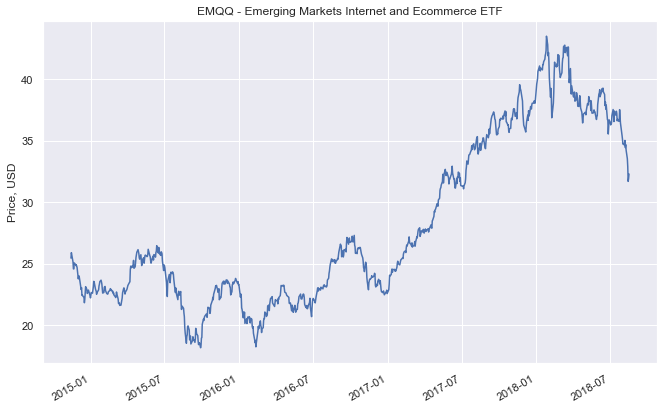

In [13]:
plt.figure(figsize=(11,7))
EMQQ.close.plot()
plt.title('EMQQ - Emerging Markets Internet and Ecommerce ETF')
plt.ylabel('Price, USD')
plt.xlabel('');

## Daily returns

In [14]:
EMQQ['daily_return'] = EMQQ.close.pct_change()
EMQQ.head()

,open,high,low,close,volume,daily_return
date,,,,,,
2014-11-13,25.8160,25.8160,25.4169,25.4660,7588,NaN
2014-11-14,25.7700,25.9268,25.4954,25.9072,54434,0.017325
2014-11-17,25.7405,25.7896,25.2993,25.3530,32142,-0.021392
2014-11-18,25.3973,25.3973,25.1130,25.1522,4551,-0.007920
2014-11-19,25.0051,25.0051,24.5149,24.5937,8558,-0.022205


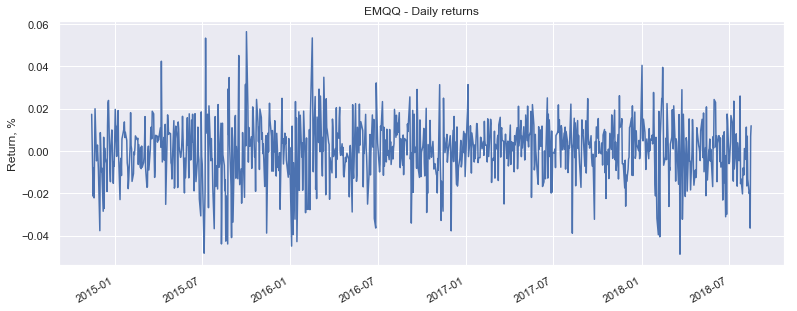

In [15]:
plt.figure(figsize=(13,5))
EMQQ.daily_return.plot()
plt.title('EMQQ - Daily returns')
plt.ylabel('Return, %')
plt.xlabel('');

We also plot a histogram of the daily returns over the past 5 years.

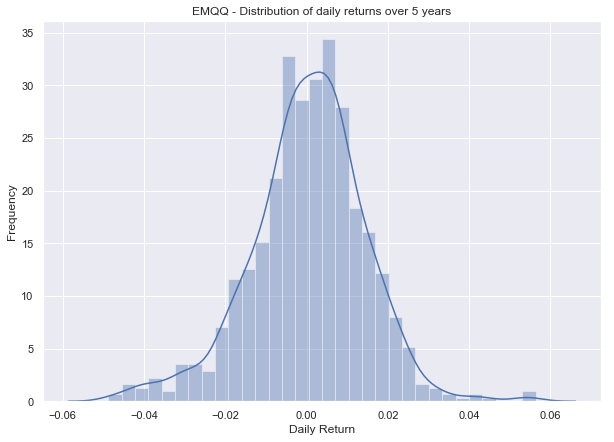

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(EMQQ.daily_return[1:])
plt.title('EMQQ - Distribution of daily returns over 5 years')
plt.ylabel('Frequency')
plt.xlabel('Daily Return');

## Volatility (1Y)
We calulate the standard deviation over the past year (252 trading days on average) in order to get a measure for the 1-year volatility of EMQQ.

In [89]:
volatility = np.std(EMQQ.daily_return[-252:])

print(f'EMQQ 1Y volatility: {volatility:.3%}')

EMQQ 1Y volatility: 1.385%


## Autocorrelation
A common test of market efficiency is to check whether returns on day ```t``` affect the returns of the next day ```t + 1```.

In [42]:
EMQQ['daily_returns_shifted'] = EMQQ.daily_return.shift(-1)
EMQQ[['daily_return', 'daily_returns_shifted']].corr()

,daily_return,daily_returns_shifted
daily_return,1.000000,0.076984
daily_returns_shifted,0.076984,1.000000


Although autocorrelation is positive at 0.076 for the observed data (5Y), the figure below shows that there is no meaniingful tendency for returns on a given day to influence the returns on the following day, which is expected.

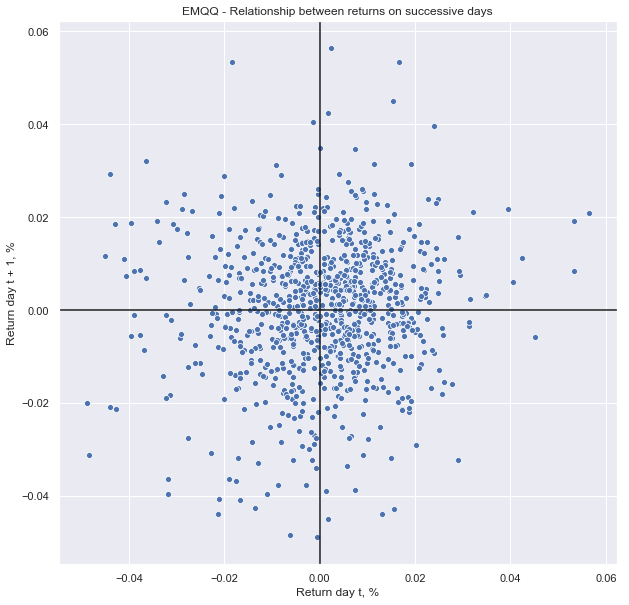

In [32]:
plt.figure(figsize=(10,10))
x = sns.scatterplot(x='daily_return', y='daily_returns_shifted', data=EMQQ)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.title('EMQQ - Relationship between returns on successive days')
plt.ylabel('Return day t + 1, %')
plt.xlabel('Return day t, %');

## Calculate and plot 1M, 3M, 6M, 1Y, 3Y and 5Y cumulative returns

and more coming soon.